# SciPy Introduction 🧠

For more introductory reference: [quick guide](https://www.tutorialspoint.com/scipy/scipy_quick_guide.htm) and [cheatsheet](https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_SciPy_Cheat_Sheet_Linear_Algebra.pdf)

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
%%html
<style>
  table {margin-left: 0 !important;}
</style>

### Subpackages

| Name              | Desciption                             |
|-------------------|----------------------------------------|
| scipy.cluster     | Vector quantization / Kmeans           |
| scipy.constants   | Physical and mathematical constants    |
| scipy.fftpack     | Fourier transform                      |
| scipy.integrate   | Integration routines                   |
| scipy.interpolate | Interpolation                          |
| scipy.io          | Data input and output                  |
| scipy.linalg      | Linear algebra routines                |
| scipy.ndimage     | n-dimensional image package            |
| scipy.odr         | Orthogonal distance regression         |
| scipy.optimize    | Optimization                           |
| scipy.signal      | Signal processing                      |
| scipy.sparse      | Sparse matrices                        |
| scipy.spatial     | Spatial data structures and algorithms |
| scipy.special     | Any special mathematical functions     |
| scipy.stats       | Statistics                             |

### Integration (quadrature)

Integrate the funciton:
$$f(x) = \int_0^4 x^2 \,dx= 21\frac13$$

In [19]:
import scipy.integrate

ans, err = scipy.integrate.quad(lambda x: x**2, 0, 4)
ans

21.333333333333336

### Matrix Inverse

The inverse of a square matrix A, sometimes called a reciprocal matrix, is a matrix $A^{-1}$ such that

$$AA^{-1}=I$$

where I is the identity matrix. Courant and Hilbert (1989, p. 10)

$$A = \begin{bmatrix}
       a_{11} & a_{12} \\ 
       a_{21} & a_{22}
    \end{bmatrix}
$$

$$\det A\equiv\lvert A\rvert=a_{11}a_{22}-a_{12}a_{21}\ne0$$ 


$$A^{-1} = \begin{bmatrix}
          a_{11} & a_{12} \\ 
          a_{21} & a_{22}
       \end{bmatrix}^{-1} = \frac{1}{\lvert A\rvert}
       \begin{bmatrix}
           a_{22} & -a_{12} \\ 
          -a_{21} &  a_{11}
       \end{bmatrix}$$

In [20]:
import scipy.linalg

a = np.random.rand(3,3)
scipy.linalg.inv(a)

array([[ 0.3112717 ,  2.43452263, -1.31121991],
       [-0.97855877, -0.70659315,  1.669575  ],
       [ 0.83087667, -2.04974451,  1.02506543]])

### Eigenvalues

In [21]:
import scipy.linalg

a = np.random.rand(3,3)
scipy.linalg.eigvals(a)

array([1.69979758+0.j        , 0.17755352+0.39967476j,
       0.17755352-0.39967476j])

### Interpolation

Interpolation is the process of finding a value between two points on a line or a curve.

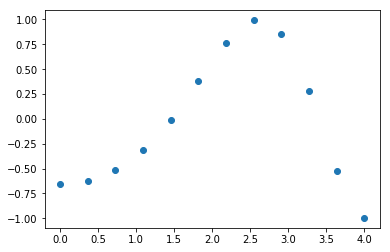

In [27]:
from scipy import interpolate

x = np.linspace(0, 4, 12)
y = np.cos(x**2/3+4)

plt.plot(x, y,'o')
plt.show()

In [45]:
f1 = interpolate.interp1d(x, y,kind = 'linear')

f2 = interpolate.interp1d(x, y, kind = 'cubic')

array(-0.05265309)

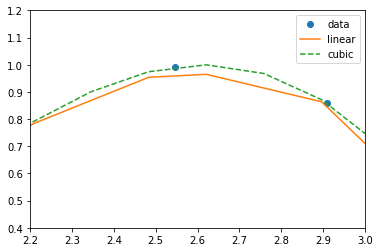

In [43]:
xnew = np.linspace(0, 4,30)

fix, ax = plt.subplots()

ax.plot(x, y, 'o', xnew, f1(xnew), '-', xnew, f2(xnew), '--')

ax.legend(['data', 'linear', 'cubic','nearest'], loc = 'best')
ax.set_xlim([2.2, 3])
ax.set_ylim([0.4, 1.2])

plt.show()

# Optimization

Rosenbroke function:
$f(x,y)=(a-x)^{2}+b(y-x^{2})^{2}$

In [53]:
from scipy import optimize

f = lambda x: .5*(1 - x[0])**2 + (x[1] - x[0]**2)**2 # Rosenbroke function

f([1,1]) # minimum

0.0

### Brute

In [60]:
# optimize.brute(function, range???)
optimize.brute(f, ((-5, 5), (-5, 5)))

array([0.99999324, 1.00001283])

### Differential evolution

Genetic algorithm (?)

for non-smooth or non-differentiable functions

In [66]:
optimize.differential_evolution(f, ((-5, 5), (-5, 5)))

     fun: 7.395570986446986e-32
 message: 'Optimization terminated successfully.'
    nfev: 3573
     nit: 118
 success: True
       x: array([1., 1.])

### Gradient

In [67]:
# gradient of f
g = lambda x: np.array((-2*.5*(1 - x[0]) - 4*x[0]*(x[1] - x[0]**2), 2*(x[1] - x[0]**2)))

In [68]:
# returns an error difference between g and approxiamted gradient of f
optimize.check_grad(f, g, [2, 2])

2.384185791015625e-07

### BFGS

for pretty smooth functions

In [72]:
optimize.fmin_bfgs(f, [2, 2], fprime=g)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9


array([1.00000582, 1.00001285])

### Minimize module

chooses the method and finds the gradient by itself

* `nfev` = number of evaluations of the objective functions 
* `nit` = number of iterations

In [75]:
optimize.minimize(f, [2, 2])

      fun: 1.7838045907468558e-11
 hess_inv: array([[0.95489061, 1.90006632],
       [1.90006632, 4.27872378]])
      jac: array([9.88093227e-07, 2.41749084e-06])
  message: 'Optimization terminated successfully.'
     nfev: 36
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000573, 1.00001265])

can also use specific methods and specify a gradient `jac = g`

In [78]:
optimize.minimize(f, [2, 2], method='BFGS')

      fun: 1.8414093407262628e-11
 hess_inv: array([[0.95489113, 1.90006768],
       [1.90006768, 4.27872719]])
      jac: array([9.88085521e-07, 2.41739812e-06])
  message: 'Optimization terminated successfully.'
     nfev: 9
      nit: 8
     njev: 9
   status: 0
  success: True
        x: array([1.00000582, 1.00001285])

In [77]:
optimize.minimize(f, [2, 2], method='Nelder-Mead')

 final_simplex: (array([[0.99998568, 0.99996682],
       [1.00002149, 1.00004744],
       [1.0000088 , 1.00003552]]), array([1.23119954e-10, 2.50768082e-10, 3.59639951e-10]))
           fun: 1.2311995365407462e-10
       message: 'Optimization terminated successfully.'
          nfev: 91
           nit: 46
        status: 0
       success: True
             x: array([0.99998568, 0.99996682])

In [82]:
?scipy.spatial.distance.cosine

In [103]:
s = [0,1,2,3,4,5,6,7,8]
m = 3
?scipy.linalg.solve